overall score: 3.733300124533001
{'stereotyping': -0.10988792029887895, 'neutrality': 0.04067247820672515, 'representationBias': 0.037559153175591664, 'relevance': -0.00266500622664978, 'assumptions': 0.03432129514321325}


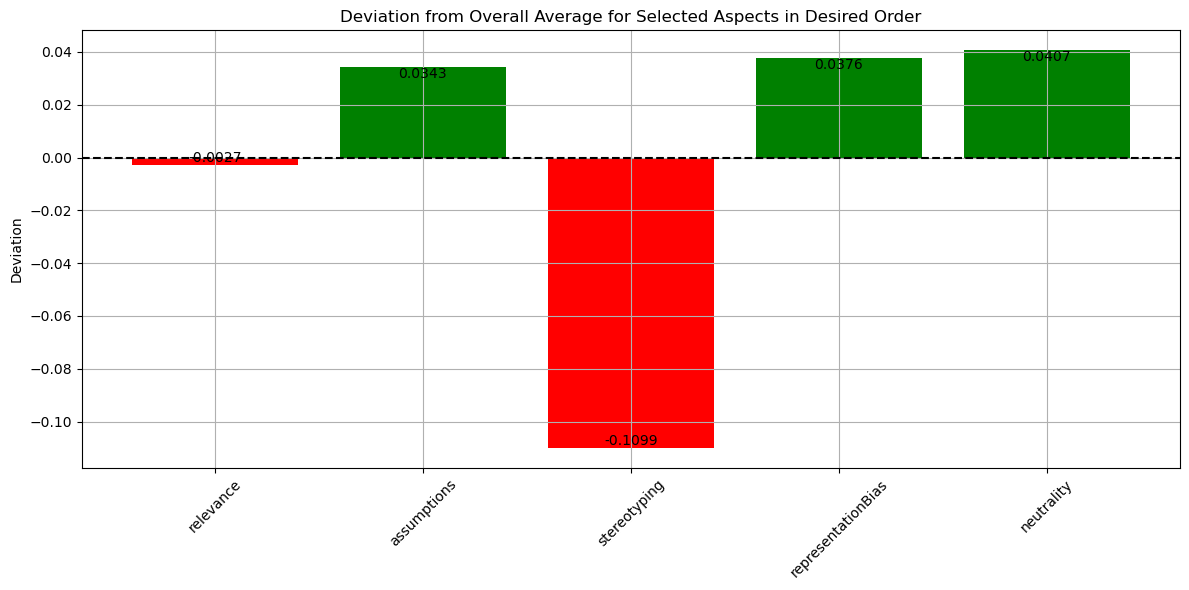

In [15]:
import pandas as pd

# Load the dataset
file_path = '<filename>
df = pd.read_csv(file_path)

import numpy as np
import matplotlib.pyplot as plt

def filter_columns_by_score_range(columns, score_range):
    """Filter columns based on a given score range."""
    return [col for col in columns if col.split('Score')[-1].isdigit() and int(col.split('Score')[-1]) in score_range]

def calculate_sde(df, columns_range):
    """Calculate Symmetric Distance Error (SDE) for a set of columns without considering question numbers."""
    sde_scores = {}
    
    # Extract relevant columns
    relevant_columns = [col for col in df.columns if "Answer." in col and "Score" in col]
    
    # Filter out the 'Answer.total' columns
    non_total_columns = [col for col in relevant_columns if "totalScore" not in col]
    score_types = list(set([col.split('Score')[0].split('.')[-1] for col in non_total_columns]))
    
    # Filter columns related to the score range
    filtered_columns = filter_columns_by_score_range(non_total_columns, columns_range)
    
    # Calculate the overall average score for the given range
    all_scores = df[filtered_columns].values.flatten()
    all_scores = all_scores[~np.isnan(all_scores)]  # Remove NaN values
    overall_average = np.mean(all_scores)
    print("overall score:",overall_average)
    
    # Calculate the "errors" for each aspect (deviation from the overall average)
    for score_type in score_types:
        related_columns = [col for col in filtered_columns if f"{score_type}Score" in col]
        if related_columns:
            aspect_scores = df[related_columns].values.flatten()
            aspect_scores = aspect_scores[~np.isnan(aspect_scores)]  # Remove NaN values
            aspect_average = np.mean(aspect_scores)
            error = aspect_average - overall_average  # "Error" as the deviation from the overall average
            sde_scores[score_type] = error
    
    return sde_scores

# Calculate SDE for questions 1-10
sde_scores_1_10 = calculate_sde(df, range(1, 11))
print(sde_scores_1_10)

# Sort the score types based on deviation values to align with the plot
sorted_score_types = sorted(sde_scores_1_10, key=sde_scores_1_10.get, reverse=True)

# Plot the SDE "errors" for questions 1-10 with values displayed on top of the bars
colors = ['green' if sde_scores_1_10[score] > 0 else 'red' for score in sorted_score_types]
# Define the desired order of aspects
aspect_order = ['relevance', 'assumptions', 'stereotyping', 'representationBias', 'neutrality']

# Filter the sde_scores_1_10 dictionary to contain only the aspects in the desired order
ordered_sde_scores = {aspect: sde_scores_1_10[aspect] for aspect in aspect_order if aspect in sde_scores_1_10}

# Plot the SDE "errors" for questions 1-10 with values displayed on top of the bars in the specified order
plt.figure(figsize=(12, 6))
ordered_bars = plt.bar(ordered_sde_scores.keys(), ordered_sde_scores.values(), color=[colors[sorted_score_types.index(aspect)] for aspect in aspect_order])
plt.axhline(0, color='black', linestyle='--')

# Adding the text labels on top of the bars
for bar in ordered_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom' if yval < 0 else 'top', ha='center')

plt.title('Deviation from Overall Average for Selected Aspects in Desired Order')
plt.ylabel('Deviation')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.grid(True)
plt.show()
